In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('Hospital_Readmissions_Reduction_Program.csv', sep=';')

In [5]:
df.head()

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,742.0,NaN,1.0446,15.2935,14.6404,116,07/01/2015,06/30/2018
1,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,279.0,NaN,1.2361,14.5943,11.8065,46,07/01/2015,06/30/2018
2,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-COPD-HRRP,495.0,NaN,1.0249,18.6162,18.1637,94,07/01/2015,06/30/2018
3,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,1114.0,NaN,1.0453,22.3772,21.4082,252,07/01/2015,06/30/2018
4,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,301.0,NaN,1.1787,5.5863,4.7392,20,07/01/2015,06/30/2018


In [6]:
df.columns

Index(['Facility Name', 'Facility ID', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19344 entries, 0 to 19343
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Facility Name               19344 non-null  object 
 1   Facility ID                 19344 non-null  int64  
 2   State                       19344 non-null  object 
 3   Measure Name                19344 non-null  object 
 4   Number of Discharges        11440 non-null  float64
 5   Footnote                    5274 non-null   float64
 6   Excess Readmission Ratio    14071 non-null  float64
 7   Predicted Readmission Rate  14071 non-null  float64
 8   Expected Readmission Rate   14071 non-null  float64
 9   Number of Readmissions      14071 non-null  object 
 10  Start Date                  19344 non-null  object 
 11  End Date                    19344 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 1.8+ MB


In [8]:
df.describe()

,Facility ID,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate
count,19344.000000,11440.000000,5274.000000,14071.000000,14071.000000,14071.000000
mean,262195.596154,393.304808,3.635950,1.002507,15.383346,15.337661
std,162257.586241,363.203205,1.981472,0.089052,5.959672,5.778370
min,10001.000000,0.000000,1.000000,0.623000,2.199400,2.799700
25%,110110.500000,158.000000,1.000000,0.950850,13.285200,13.540200
50%,250089.000000,290.000000,5.000000,0.997800,16.712700,16.639300
75%,390117.500000,508.000000,5.000000,1.049400,19.559800,19.647700
max,670128.000000,9356.000000,23.000000,2.183200,30.257900,25.697100


In [9]:
df['Number of Discharges'] = df['Number of Discharges'].fillna(0) #change NaN to 0

In [10]:
df['Number of Readmissions'] = df['Number of Readmissions'].fillna(0) #change NaN to 0

In [11]:
df['Number of Readmissions'] = df['Number of Readmissions'].apply(lambda x: 0 if x == 'Too Few to Report' else x)

In [12]:
df['Number of Readmissions'] = df['Number of Readmissions'].astype(int)

In [13]:
df['Number of Discharges'] = df['Number of Discharges'].astype(int)

In [14]:
df['Readmission Rate'] = df['Number of Readmissions'] / df['Number of Discharges']

In [15]:
grouped = df.groupby(['Measure Name']).sum()

In [16]:
grouped.head(20)

,Facility ID,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Readmission Rate
Measure Name,,,,,,,,
READM-30-AMI-HRRP,845318602,451012,2553.0,2055.9831,32363.5230,32253.4216,68969,265.543623
READM-30-CABG-HRRP,845318602,105425,10563.0,995.1767,12719.4873,12682.3021,13706,80.704918
READM-30-COPD-HRRP,845318602,749287,1245.0,2823.3156,53748.3259,53662.3392,147338,489.551537
READM-30-HF-HRRP,845318602,1129905,1263.0,2848.4037,59993.6523,59824.8248,242078,568.679846
READM-30-HIP-KNEE-HRRP,845318602,832235,2495.0,2467.2966,10439.5935,10352.2775,33265,57.812966
READM-30-PN-HRRP,845318602,1231543,1057.0,2916.0987,47194.4743,47041.0630,204867,445.382142


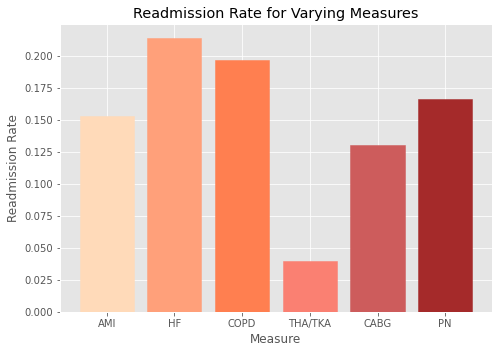

In [31]:
bars = ['AMI', 'HF', 'COPD', 'THA/TKA', 'CABG', 'PN']
readmission_rate = [(68969/451012), (242078/1129905), (147338/749287), (33265/832235), (13706/105425), (204867/1231543)]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(bars, readmission_rate)
ax.set_title('Readmission Rate for Varying Measures')
ax.set_xlabel('Measure')
ax.set_ylabel('Readmission Rate')
ax.get_children()[0].set_color('peachpuff')
ax.get_children()[1].set_color('lightsalmon')
ax.get_children()[2].set_color('coral')
ax.get_children()[3].set_color('salmon')
ax.get_children()[4].set_color('indianred')
ax.get_children()[5].set_color('brown')
plt.show()